In [1]:
import numpy as np

In [5]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        #Mean Centering - To reduce the multi-collinearity
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        #Finds joint variability between the variables
        covar = np.cov(X.T)
        
        """
        From Wikipedia:
        
        In essence, an eigenvector v of a linear transformation T is a nonzero vector that, 
        when T is applied to it, does not change direction. Applying T to the eigenvector 
        only scales the eigenvector by the scalar value λ, called an eigenvalue. 
        
        eigenvector - Covariance(T) calculated is a linear transformation between variables, 
        then v is an eigenvector of T if T(v) is a scalar multiple of v.
        
        eigenvalue - scales the eigenvector.
        """
        eigenValues, eigenVectors = np.linalg.eig(covar)
        eigenVectors = eigenVectors.T
        
        idxs = np.argsort(eigenValues)[::-1]
        
        eigenValues = eigenValues[idxs]
        eigenVectors = eigenVectors[idxs]
        
        self.components = eigenVectors[0: self.n_components]
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


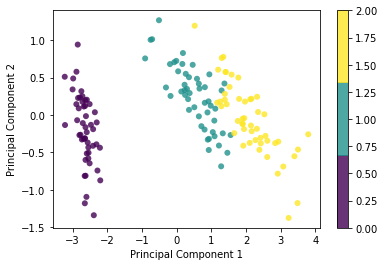

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()